In [14]:
using DelimitedFiles
using PyPlot
using FLOWMath: Akima, linear

In [16]:
wind_data = readdlm("inputfiles/windrose_amalia_72dirs.txt",  ' ', skipstart=1)
# data = readdlm("inputfiles/windrose_amalia_36dirs.txt",  ' ', skipstart=1)
winddirections = wind_data[:, 1]
windspeeds = wind_data[:,2]
windprobabilities = wind_data[:, 3]
nstates = length(windspeeds)

72

# Original Distribution

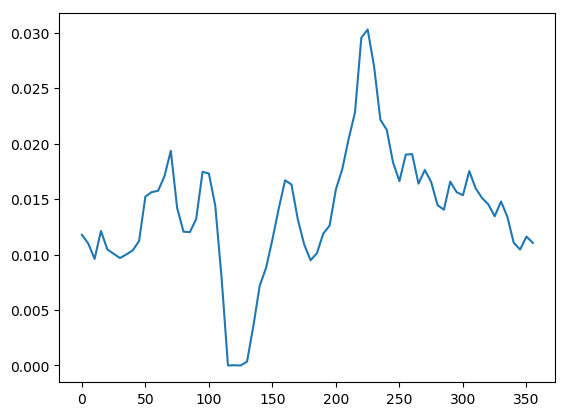

In [17]:
plot(winddirections,windprobabilities)
show()

# Splined and Renormalized Distribution

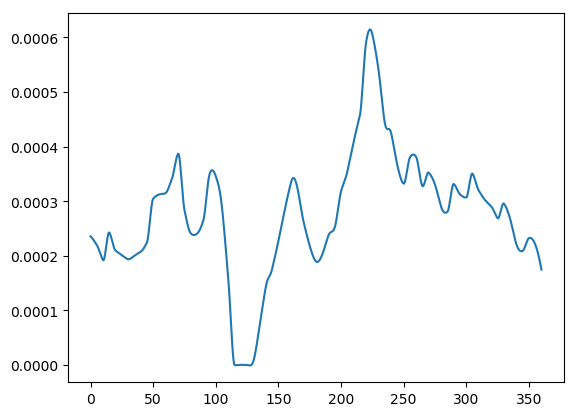

0.9986347073686911

In [69]:
pspline = Akima(winddirections,windprobabilities)
step = 0.1
d = 0:step:360
# p = zeros(length(d))
# for i=1:length(d)
#     p[i]=Akima(d)
p = pspline(d)*length(winddirections)/length(d)
plot(d,p)
show()
sum(p)

# Getting the Probability of a Sector

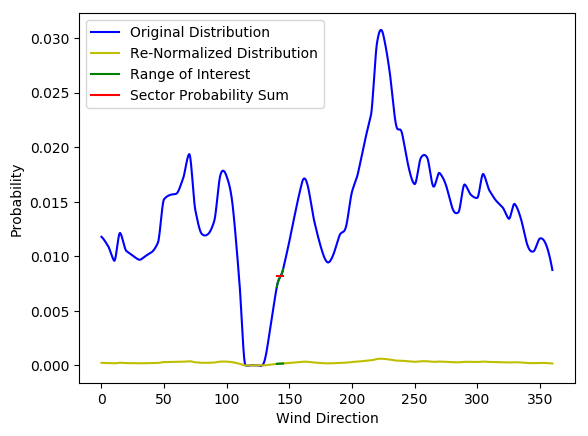

In [82]:
start = 140
finish = 145
dint = start:step:finish
# make a new spline function based on scaling the original one by the new bin amount
nspline(x) = pspline(x)*length(winddirections)/length(d)
pint = nspline(dint)

plot(d,pspline(d),"b",label="Original Distribution")
plot(d,p,"y",label="Re-Normalized Distribution")
plot(dint,pint,"g",label="Range of Interest")
plot(dint,pspline(dint),"g")
plot([start,finish],[sum(pint),sum(pint)],"r",label="Sector Probability Sum")
xlabel("Wind Direction")
ylabel("Probability")
legend()
show()